# Técnicas de seleção de features

Fonte: https://github.com/shwe24/CVD_death_event-classification/blob/main/Heart_failure_survival_prediction.ipynb

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/MESTRADO/2022 - S2/Implementação - Artigo AINA/Dataset/urldata-1000.csv'

In [ ]:
data = pd.read_csv(dataset, encoding='ISO-8859-1')
data.head()

,url,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,...,validCert,subjectAltNameSSL,subjectNameSSL,issuerNameSSL,mean_degree,density,avg_clustering,transitivity,network_efficiency,Label
0,https://www.apple.com/,apple.com,0,0,0,0,0,0,0,0,...,0,1,0,0,46.916667,0.493860,0.778458,0.745666,0.733955,0
1,https://www.google.com/,google.com,0,0,0,0,0,0,0,0,...,0,131,0,0,4.777778,0.281046,0.559656,0.644860,0.480392,0
2,https://www.youtube.com/,youtube.com,0,0,0,0,0,0,0,0,...,0,131,0,0,8.166667,0.742424,0.786508,0.840659,0.863636,0
3,https://www.blogger.com/about/?bpli=1,blogger.com,0,0,0,1,0,0,0,0,...,0,4,0,0,13.466667,0.961905,0.967277,0.965217,0.980952,0
4,https://www.microsoft.com/pt-br/,microsoft.com,0,0,0,1,0,0,1,0,...,0,115,0,0,34.888889,0.392010,0.793991,0.869983,0.572468,0


In [ ]:
#Checking the shape of the dataset
data.shape

(1000, 32)

In [ ]:
#Listing the features of the dataset
data.columns

Index(['url', 'Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'versionSSL', 'serialNumberSSL',
       'expirationDateSSL', 'startDateSSL', 'validCert', 'subjectAltNameSSL',
       'subjectNameSSL', 'issuerNameSSL', 'mean_degree', 'density',
       'avg_clustering', 'transitivity', 'network_efficiency', 'Label'],
      dtype='object')

In [ ]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 1000 non-null   object 
 1   Domain              999 non-null    object 
 2   Have_IP             1000 non-null   int64  
 3   Have_At             1000 non-null   int64  
 4   URL_Length          1000 non-null   int64  
 5   URL_Depth           1000 non-null   int64  
 6   Redirection         1000 non-null   int64  
 7   https_Domain        1000 non-null   int64  
 8   TinyURL             1000 non-null   int64  
 9   Prefix/Suffix       1000 non-null   int64  
 10  DNS_Record          1000 non-null   int64  
 11  Web_Traffic         1000 non-null   int64  
 12  Domain_Age          1000 non-null   int64  
 13  Domain_End          1000 non-null   int64  
 14  iFrame              1000 non-null   int64  
 15  Mouse_Over          1000 non-null   int64  
 16  Right_C

In [ ]:
#Dropping the Domain column
data = data.drop(['url', 'Domain'], axis = 1).copy()

In [ ]:
#Checking the shape of the dataset
data.shape

(1000, 30)

In [ ]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP                 0
Have_At                 0
URL_Length              0
URL_Depth               0
Redirection             0
https_Domain            0
TinyURL                 0
Prefix/Suffix           0
DNS_Record              0
Web_Traffic             0
Domain_Age              0
Domain_End              0
iFrame                  0
Mouse_Over              0
Right_Click             0
Web_Forwards            0
versionSSL              0
serialNumberSSL         0
expirationDateSSL       0
startDateSSL            0
validCert               0
subjectAltNameSSL       0
subjectNameSSL          0
issuerNameSSL           0
mean_degree           509
density                 0
avg_clustering          0
transitivity            0
network_efficiency      0
Label                   0
dtype: int64

In [ ]:
data['mean_degree'] = data['mean_degree'].fillna(0)

In [ ]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP               0
Have_At               0
URL_Length            0
URL_Depth             0
Redirection           0
https_Domain          0
TinyURL               0
Prefix/Suffix         0
DNS_Record            0
Web_Traffic           0
Domain_Age            0
Domain_End            0
iFrame                0
Mouse_Over            0
Right_Click           0
Web_Forwards          0
versionSSL            0
serialNumberSSL       0
expirationDateSSL     0
startDateSSL          0
validCert             0
subjectAltNameSSL     0
subjectNameSSL        0
issuerNameSSL         0
mean_degree           0
density               0
avg_clustering        0
transitivity          0
network_efficiency    0
Label                 0
dtype: int64

In [ ]:
!pip install plotly==4.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.1 MB 5.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=a43e1bf35f6a6f807a074202d48d835560c80370cf916ae872b1e31737417855
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
from collections import Counter
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

3.1 Extra Tree Classifier

In [ ]:
X=data.iloc[:,0:29]
Y=data['Label']

[0.         0.00206492 0.14347912 0.08576557 0.00037933 0.
 0.01621253 0.05220829 0.00867226 0.03024523 0.02295091 0.01843862
 0.00758495 0.00908309 0.00031599 0.01128887 0.01831491 0.02887578
 0.02708898 0.01533777 0.02067513 0.04100983 0.02822674 0.01276953
 0.03215421 0.03794274 0.12762202 0.13916691 0.06212577]


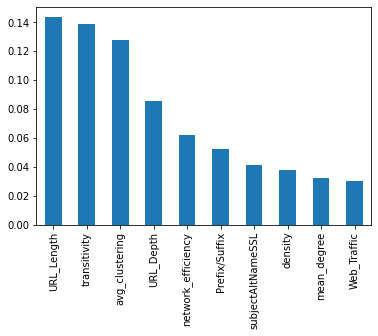

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot.bar()
plt.show()

list1=feat_importances.keys().to_list()

3.2 Forward Selection

In [ ]:
X=data.iloc[:,0:29]
Y=data['Label']

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
forward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=10,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)
           
fselector = forward_feature_selector.fit(X,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   40.0s finished

[2022-10-31 17:42:22] Features: 1/10 -- score: 0.88436[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   36.1s finished

[2022-10-31 17:42:59] Features: 2/10 -- score: 0.94496[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   36.2s finished

[2022-10-31 17:43:35] Features: 3/10 -- score: 0.96656[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s 

In [ ]:
fward=fselector.k_feature_names_
list2=list(fward)
list2

['URL_Depth',
 'TinyURL',
 'Prefix/Suffix',
 'DNS_Record',
 'Web_Traffic',
 'Mouse_Over',
 'expirationDateSSL',
 'subjectAltNameSSL',
 'issuerNameSSL',
 'mean_degree']


3.3 Chi-square Test

In [ ]:
X=data.iloc[:,0:29]
Y=data['Label']

In [ ]:
chi2_features = SelectKBest(chi2, k = 10) 
X_kbest_features = chi2_features.fit_transform(X, Y)
mask=chi2_features.get_support()
new_feature=[]
for bool,feature in zip(mask,X.columns):
  if bool:
    new_feature.append(feature)
list3=new_feature
list3

['URL_Length',
 'URL_Depth',
 'expirationDateSSL',
 'startDateSSL',
 'validCert',
 'subjectAltNameSSL',
 'subjectNameSSL',
 'mean_degree',
 'avg_clustering',
 'transitivity']

3.4 ANOVA

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
X=data.iloc[:,0:29]
Y=data['Label']

In [ ]:
anova_features = SelectKBest(f_classif, k = 10) 
X_kbest_features = anova_features.fit_transform(X, Y)
mask=anova_features.get_support()
new_feature=[]
for bool,feature in zip(mask,X.columns):
  if bool:
    new_feature.append(feature)
list4=new_feature
list4

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['URL_Length',
 'URL_Depth',
 'versionSSL',
 'serialNumberSSL',
 'startDateSSL',
 'validCert',
 'subjectNameSSL',
 'avg_clustering',
 'transitivity',
 'network_efficiency']

In [ ]:
final_list=[list1,list2,list3,list4]
name=['Extra_Tree_Classifier','Forward_Selection','CHI-square', 'Anova']
df=pd.DataFrame(list(zip(name,final_list)),columns=['Name','Features'])
df

,Name,Features
0,Extra_Tree_Classifier,"[Have_IP, Have_At, URL_Length, URL_Depth, Redi..."
1,Forward_Selection,"[URL_Depth, TinyURL, Prefix/Suffix, DNS_Record..."
2,CHI-square,"[URL_Length, URL_Depth, expirationDateSSL, sta..."
3,Anova,"[URL_Length, URL_Depth, versionSSL, serialNumb..."


In [ ]:
feat=[]
feat= [value for value in list1 if value in list2 and value in list3 and value in list4]
feat

['URL_Depth']

# Algoritmos com a técnica: Chi-square Test

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/MESTRADO/2022 - S2/Implementação - Artigo AINA/Dataset/urldata-1000.csv'

In [ ]:
data = pd.read_csv(dataset, encoding='ISO-8859-1')
data.head()

,url,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,...,validCert,subjectAltNameSSL,subjectNameSSL,issuerNameSSL,mean_degree,density,avg_clustering,transitivity,network_efficiency,Label
0,https://www.apple.com/,apple.com,0,0,0,0,0,0,0,0,...,0,1,0,0,46.916667,0.493860,0.778458,0.745666,0.733955,0
1,https://www.google.com/,google.com,0,0,0,0,0,0,0,0,...,0,131,0,0,4.777778,0.281046,0.559656,0.644860,0.480392,0
2,https://www.youtube.com/,youtube.com,0,0,0,0,0,0,0,0,...,0,131,0,0,8.166667,0.742424,0.786508,0.840659,0.863636,0
3,https://www.blogger.com/about/?bpli=1,blogger.com,0,0,0,1,0,0,0,0,...,0,4,0,0,13.466667,0.961905,0.967277,0.965217,0.980952,0
4,https://www.microsoft.com/pt-br/,microsoft.com,0,0,0,1,0,0,1,0,...,0,115,0,0,34.888889,0.392010,0.793991,0.869983,0.572468,0


In [ ]:
#Checking the shape of the dataset
data.shape

(1000, 32)

In [ ]:
#Listing the features of the dataset
data.columns

Index(['url', 'Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'versionSSL', 'serialNumberSSL',
       'expirationDateSSL', 'startDateSSL', 'validCert', 'subjectAltNameSSL',
       'subjectNameSSL', 'issuerNameSSL', 'mean_degree', 'density',
       'avg_clustering', 'transitivity', 'network_efficiency', 'Label'],
      dtype='object')

In [ ]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 1000 non-null   object 
 1   Domain              999 non-null    object 
 2   Have_IP             1000 non-null   int64  
 3   Have_At             1000 non-null   int64  
 4   URL_Length          1000 non-null   int64  
 5   URL_Depth           1000 non-null   int64  
 6   Redirection         1000 non-null   int64  
 7   https_Domain        1000 non-null   int64  
 8   TinyURL             1000 non-null   int64  
 9   Prefix/Suffix       1000 non-null   int64  
 10  DNS_Record          1000 non-null   int64  
 11  Web_Traffic         1000 non-null   int64  
 12  Domain_Age          1000 non-null   int64  
 13  Domain_End          1000 non-null   int64  
 14  iFrame              1000 non-null   int64  
 15  Mouse_Over          1000 non-null   int64  
 16  Right_C

In [ ]:
#Dropping the Domain column
data = data.drop(['url', 'Domain', 'Have_IP', 'Have_At', 
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'versionSSL', 'serialNumberSSL', 'issuerNameSSL',
       'density', 'network_efficiency'], axis = 1).copy()

In [ ]:
#Checking the shape of the dataset
data.shape

(1000, 11)

In [ ]:
data

,URL_Length,URL_Depth,expirationDateSSL,startDateSSL,validCert,subjectAltNameSSL,subjectNameSSL,mean_degree,avg_clustering,transitivity,Label
0,0,0,2023,2022,0,1,0,46.916667,0.778458,0.745666,0
1,0,0,2022,2022,0,131,0,4.777778,0.559656,0.644860,0
2,0,0,2022,2022,0,131,0,8.166667,0.786508,0.840659,0
3,0,1,2022,2022,0,4,0,13.466667,0.967277,0.965217,0
4,0,1,2023,2022,0,115,0,34.888889,0.793991,0.869983,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,4,2022,2022,0,19,0,NaN,0.000000,0.000000,1
996,1,2,2022,2021,0,2,0,NaN,0.000000,0.000000,1
997,0,1,1,1,1,1,1,NaN,0.000000,0.000000,1
998,0,0,1,1,1,1,1,NaN,0.000000,0.000000,1


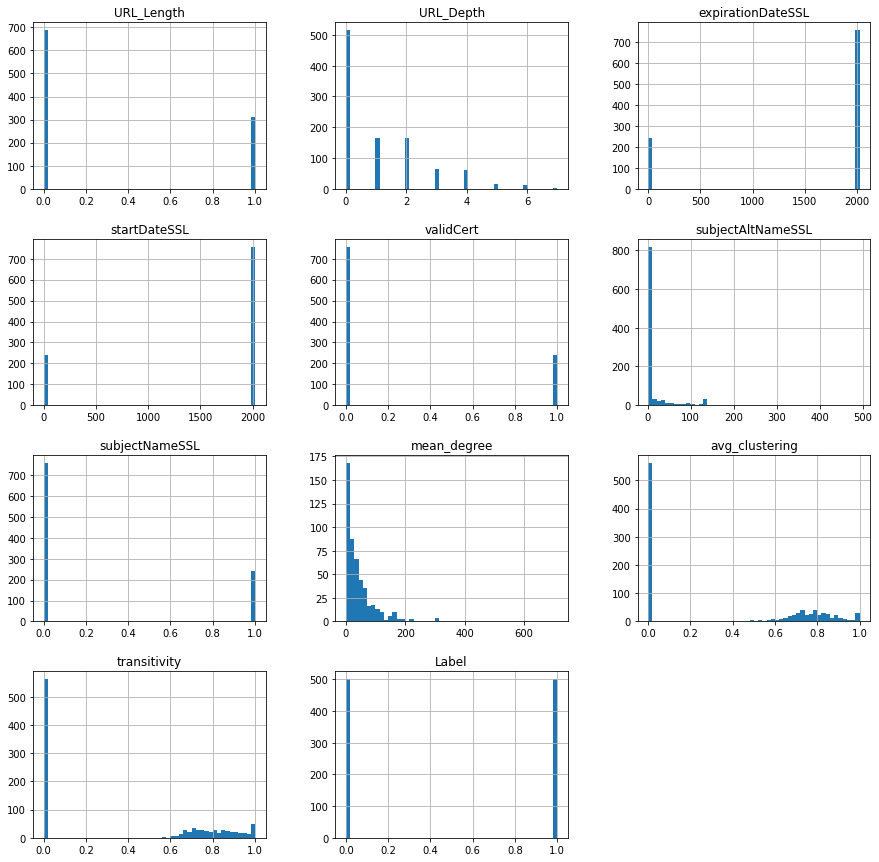

In [ ]:
#Plotting the data distribution
data.hist(bins = 50,figsize = (15,15))
plt.show()

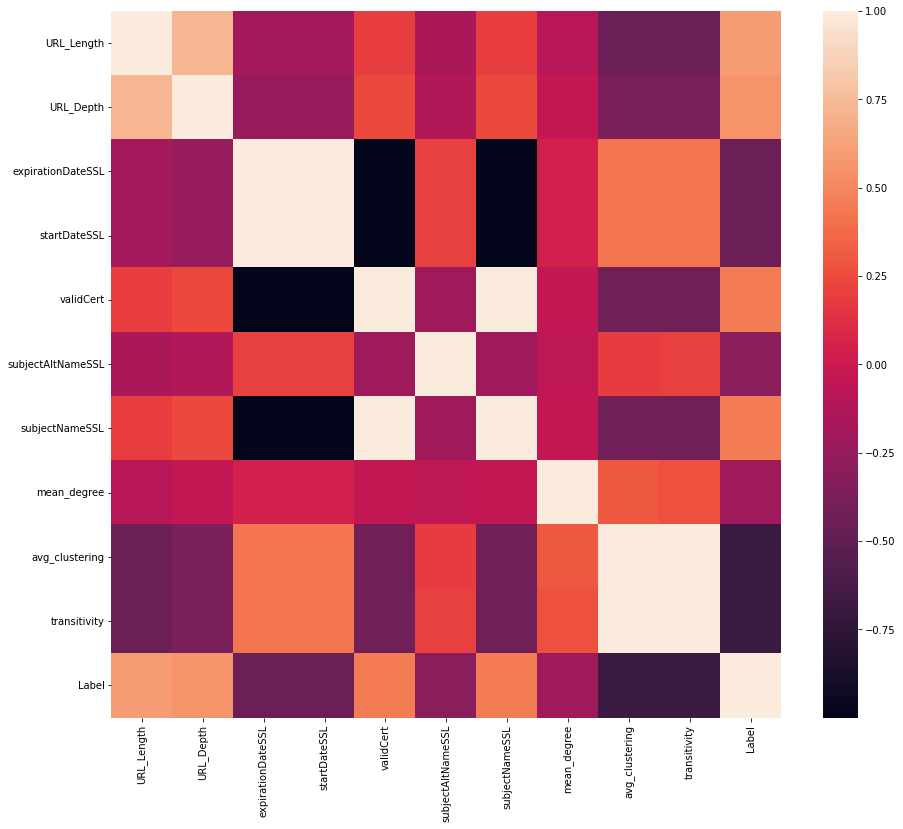

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
sns.set(font_scale = 1) # tamanho da fonte do gráfico
#plt.show()

#figure = a.get_figure()    
plt.savefig('correlation-matrix.pdf', bbox_inches='tight')

In [ ]:
data.describe()

,URL_Length,URL_Depth,expirationDateSSL,startDateSSL,validCert,subjectAltNameSSL,subjectNameSSL,mean_degree,avg_clustering,transitivity,Label
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,491.000000,1000.000000,1000.000000,1000.00000
mean,0.313000,1.093000,1533.453000,1532.86800,0.242000,14.621000,0.242000,45.326827,0.340440,0.355954,0.50000
std,0.463946,1.449984,866.318413,865.98764,0.428509,36.567397,0.428509,62.465692,0.393708,0.410678,0.50025
min,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,2022.000000,2021.00000,0.000000,1.000000,0.000000,8.708333,0.000000,0.000000,0.00000
50%,0.000000,0.000000,2023.000000,2022.00000,0.000000,2.000000,0.000000,27.127273,0.000000,0.000000,0.50000
75%,1.000000,2.000000,2023.000000,2022.00000,0.000000,6.000000,0.000000,58.577785,0.753414,0.779456,1.00000
max,1.000000,7.000000,2023.000000,2022.00000,1.000000,493.000000,1.000000,712.280624,1.000000,1.000000,1.00000


In [ ]:
#checking the data for null or missing values
data.isnull().sum()

URL_Length             0
URL_Depth              0
expirationDateSSL      0
startDateSSL           0
validCert              0
subjectAltNameSSL      0
subjectNameSSL         0
mean_degree          509
avg_clustering         0
transitivity           0
Label                  0
dtype: int64

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,URL_Length,URL_Depth,expirationDateSSL,startDateSSL,validCert,subjectAltNameSSL,subjectNameSSL,mean_degree,avg_clustering,transitivity,Label
0,0,0,2023,2022,0,14,0,23.694444,0.910865,0.986569,0
1,0,0,2022,2021,0,3,0,83.698701,0.730983,0.717414,0
2,0,0,2022,2022,0,2,0,3.555556,0.494180,0.635593,0
3,0,1,1,1,1,1,1,NaN,0.000000,0.000000,1
4,0,2,2022,2022,0,2,0,NaN,0.000000,0.000000,1


In [ ]:
data['mean_degree'] = data['mean_degree'].fillna(0)

In [ ]:
data

,URL_Length,URL_Depth,expirationDateSSL,startDateSSL,validCert,subjectAltNameSSL,subjectNameSSL,mean_degree,avg_clustering,transitivity,Label
0,0,0,2023,2022,0,14,0,23.694444,0.910865,0.986569,0
1,0,0,2022,2021,0,3,0,83.698701,0.730983,0.717414,0
2,0,0,2022,2022,0,2,0,3.555556,0.494180,0.635593,0
3,0,1,1,1,1,1,1,0.000000,0.000000,0.000000,1
4,0,2,2022,2022,0,2,0,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,2023,2022,0,5,0,84.074074,0.747010,0.746221,0
996,0,0,2022,2022,0,1,0,179.262570,0.881706,0.979734,0
997,0,0,2023,2022,0,2,0,43.424658,0.794547,0.857687,0
998,0,0,2022,2022,0,39,0,13.047619,0.803571,0.992537,0


In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((1000, 10), (1000,))

In [ ]:
# Splitting the dataset into train and test sets: 70-30 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, random_state = 12)
X_train.shape, X_test.shape

((700, 10), (300, 10))

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [ ]:
import datetime
import time

**1. Decision Tree Classifier**

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)

# get the start datetime
st = datetime.datetime.now()

# fit the model 
tree.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.003906 seconds


In [ ]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.006865 seconds


In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.4f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.4f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.9329
Decision Tree: Accuracy on test Data: 0.8500


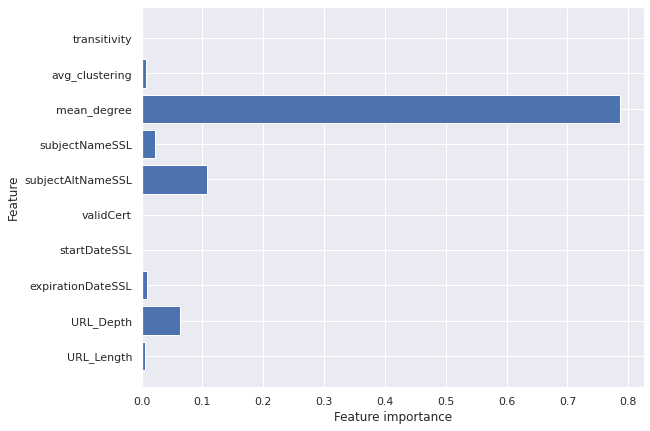

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
cm = confusion_matrix(y_test,y_test_tree)
cm

array([[130,  18],
       [ 27, 125]])

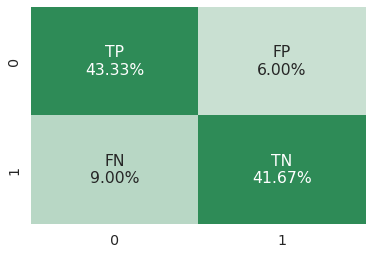

In [ ]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('4-cenario-matriz-decisiontree.pdf', bbox_inches='tight')

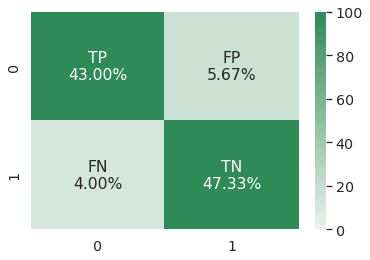

In [ ]:
# Matriz de confusão padronizada em porcentagem
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100)

figure = a.get_figure()    
plt.savefig('matriz-decisiontree.pdf', bbox_inches='tight')

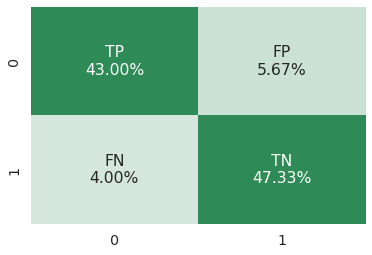

In [ ]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('matriz-decisiontree.pdf', bbox_inches='tight')

In [ ]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_tree, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.8280    0.8784    0.8525       148
class 1: phishing     0.8741    0.8224    0.8475       152

         accuracy                         0.8500       300
        macro avg     0.8511    0.8504    0.8500       300
     weighted avg     0.8514    0.8500    0.8499       300



In [ ]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,average_precision_score, accuracy_score

In [ ]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_tree)
test_ap = average_precision_score(y_test,y_test_tree)
test_ac = accuracy_score(y_test, y_test_tree.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.8504
Test Average Precision Score = 0.8089
Test Accuracy Score = 0.8500


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_tree, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_tree, y_test)
auc_roc = auc(fpr, tpr)

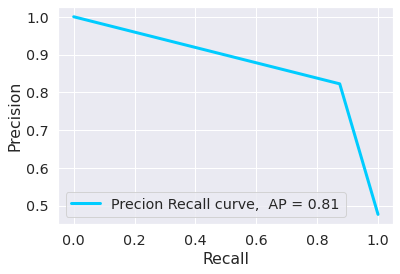

In [ ]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
 
plt.savefig('pr-decision-tree.pdf', bbox_inches='tight')

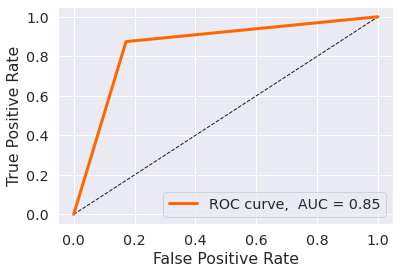

In [ ]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()

plt.savefig('4-cenario-roc-decision-tree.pdf', bbox_inches='tight')

**2. Random Forest Classifier**

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# get the start datetime
st = datetime.datetime.now()

# fit the model 
forest.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.367942 seconds


In [ ]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.086597 seconds


In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.4f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.4f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.9214
Random forest: Accuracy on test Data: 0.8867


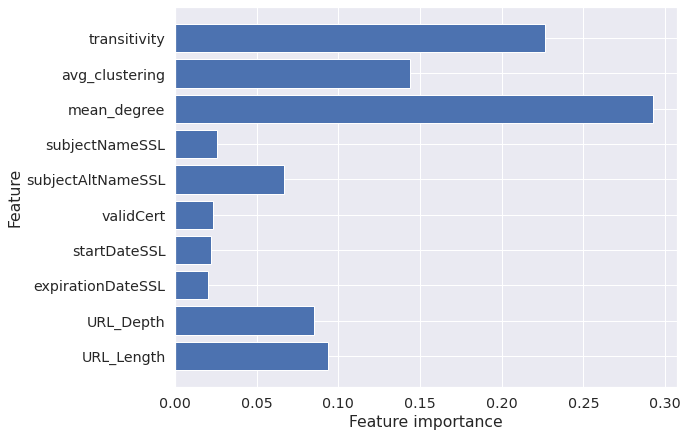

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [ ]:
cm = confusion_matrix(y_test,y_test_forest)
cm

array([[122,  26],
       [  8, 144]])

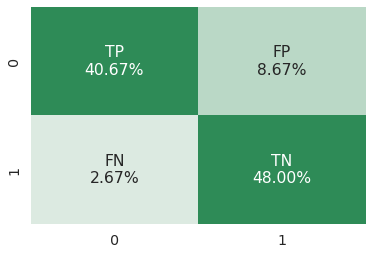

In [ ]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('4-cenario-matriz-randomforest.pdf', bbox_inches='tight')

In [ ]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_forest, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.9385    0.8243    0.8777       148
class 1: phishing     0.8471    0.9474    0.8944       152

         accuracy                         0.8867       300
        macro avg     0.8928    0.8858    0.8861       300
     weighted avg     0.8922    0.8867    0.8862       300



In [ ]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_forest)
test_ap = average_precision_score(y_test,y_test_forest)
test_ac = accuracy_score(y_test, y_test_forest.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.8858
Test Average Precision Score = 0.8291
Test Accuracy Score = 0.8867


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_forest, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_forest, y_test)
auc_roc = auc(fpr, tpr)

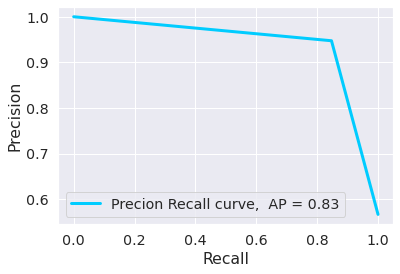

In [ ]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
  
plt.savefig('pr-random-forest.pdf', bbox_inches='tight')

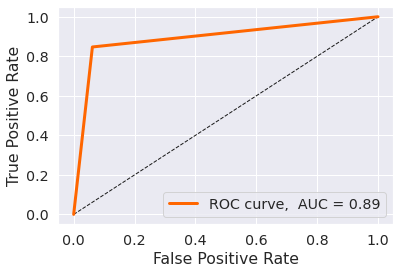

In [ ]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()
 
plt.savefig('4-cenario-roc-random-forest.pdf', bbox_inches='tight')

**3. Multilayer Perceptrons (MLPs)**

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# get the start datetime
st = datetime.datetime.now()

# fit the model 
mlp.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.627163 seconds


In [ ]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.016399 seconds


In [ ]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.4f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.4f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.7157
Multilayer Perceptrons: Accuracy on test Data: 0.6600


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

In [ ]:
cm = confusion_matrix(y_test,y_test_mlp)
cm

array([[138,  10],
       [ 92,  60]])

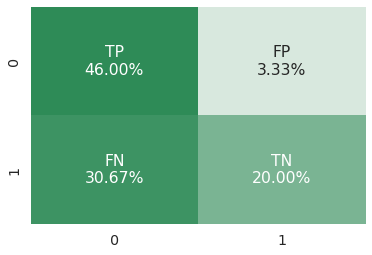

In [ ]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('4-cenario-matriz-mlp.pdf', bbox_inches='tight')

In [ ]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_mlp, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.6000    0.9324    0.7302       148
class 1: phishing     0.8571    0.3947    0.5405       152

         accuracy                         0.6600       300
        macro avg     0.7286    0.6636    0.6353       300
     weighted avg     0.7303    0.6600    0.6341       300



In [ ]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_mlp)
test_ap = average_precision_score(y_test,y_test_mlp)
test_ac = accuracy_score(y_test, y_test_mlp.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.6636
Test Average Precision Score = 0.6450
Test Accuracy Score = 0.6600


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_mlp, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_mlp, y_test)
auc_roc = auc(fpr, tpr)

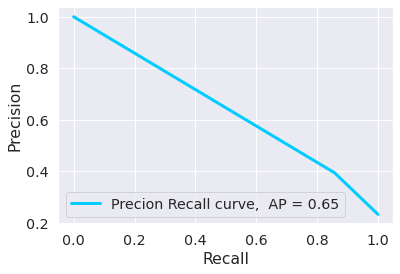

In [ ]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
    
plt.savefig('pr-mlp.pdf', bbox_inches='tight')

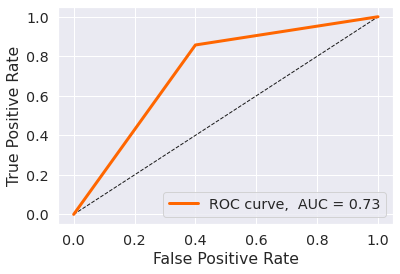

In [ ]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()
 
plt.savefig('4-cenarioroc-mlp.pdf', bbox_inches='tight')

**4. XGBoost Classifier**

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

# get the start datetime
st = datetime.datetime.now()

#fit the model
xgb.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.171985 seconds


In [ ]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.056420 seconds


In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.4f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.4f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.9643
XGBoost : Accuracy on test Data: 0.9300


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [ ]:
cm = confusion_matrix(y_test,y_test_xgb)
cm

array([[130,  18],
       [  3, 149]])

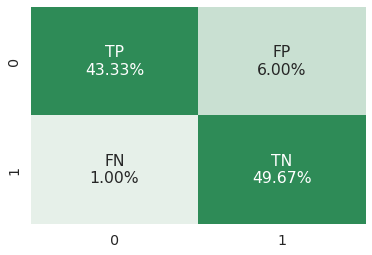

In [ ]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('4-cenario-matriz-xgboost.pdf', bbox_inches='tight')

In [ ]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_xgb, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.9774    0.8784    0.9253       148
class 1: phishing     0.8922    0.9803    0.9342       152

         accuracy                         0.9300       300
        macro avg     0.9348    0.9293    0.9297       300
     weighted avg     0.9343    0.9300    0.9298       300



In [ ]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_xgb)
test_ap = average_precision_score(y_test,y_test_xgb)
test_ac = accuracy_score(y_test, y_test_xgb.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.9293
Test Average Precision Score = 0.8846
Test Accuracy Score = 0.9300


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_xgb, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_xgb, y_test)
auc_roc = auc(fpr, tpr)

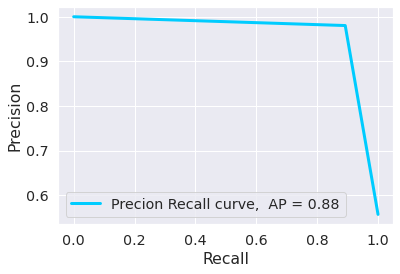

In [ ]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()

plt.savefig('pr-xgboost.pdf', bbox_inches='tight')

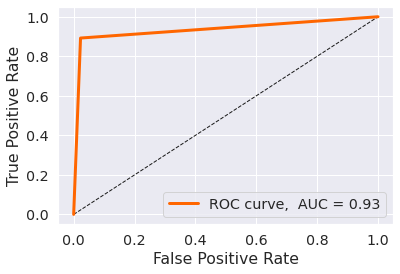

In [ ]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()

plt.savefig('4-cenario-roc-xgboost.pdf', bbox_inches='tight')

**5. Support Vector Machines**

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)

# get the start datetime
st = datetime.datetime.now()

#fit the model
svm.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.036943 seconds


In [ ]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.016236 seconds


In [ ]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.4f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.4f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.9057
SVM : Accuracy on test Data: 0.8667


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

In [ ]:
cm = confusion_matrix(y_test,y_test_svm)
cm

array([[137,  11],
       [ 29, 123]])

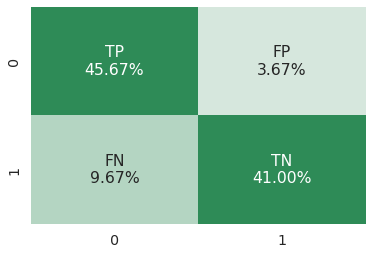

In [ ]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('4-cenario-matriz-svm.pdf', bbox_inches='tight')

In [ ]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_svm, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.8253    0.9257    0.8726       148
class 1: phishing     0.9179    0.8092    0.8601       152

         accuracy                         0.8667       300
        macro avg     0.8716    0.8674    0.8664       300
     weighted avg     0.8722    0.8667    0.8663       300



In [ ]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_svm)
test_ap = average_precision_score(y_test,y_test_svm)
test_ac = accuracy_score(y_test, y_test_svm.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.8674
Test Average Precision Score = 0.8394
Test Accuracy Score = 0.8667


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_svm, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_svm, y_test)
auc_roc = auc(fpr, tpr)

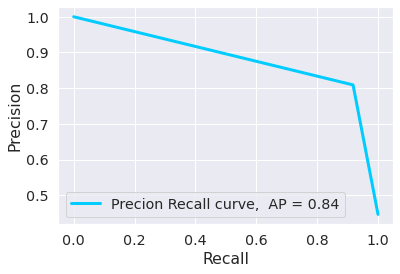

In [ ]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
 
plt.savefig('pr-svm.pdf', bbox_inches='tight')

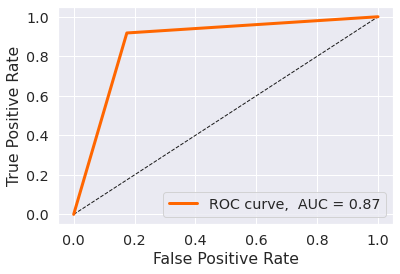

In [ ]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()

plt.savefig('4-cenario-roc-svm.pdf', bbox_inches='tight')

**Comparision of Models**

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.933,0.850
1,Random Forest,0.921,0.887
2,Multilayer Perceptrons,0.716,0.660
3,XGBoost,0.964,0.930
4,SVM,0.906,0.867


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.964,0.930
1,Random Forest,0.921,0.887
4,SVM,0.906,0.867
0,Decision Tree,0.933,0.850
2,Multilayer Perceptrons,0.716,0.660


In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = '/content/drive/MyDrive/MESTRADO/2022 - S2/Implementação - Artigo AINA/Dataset/urldata-1000.csv'

In [ ]:
data = pd.read_csv(dataset, encoding='ISO-8859-1')
data.head()

,url,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,...,validCert,subjectAltNameSSL,subjectNameSSL,issuerNameSSL,mean_degree,density,avg_clustering,transitivity,network_efficiency,Label
0,https://www.apple.com/,apple.com,0,0,0,0,0,0,0,0,...,0,1,0,0,46.916667,0.493860,0.778458,0.745666,0.733955,0
1,https://www.google.com/,google.com,0,0,0,0,0,0,0,0,...,0,131,0,0,4.777778,0.281046,0.559656,0.644860,0.480392,0
2,https://www.youtube.com/,youtube.com,0,0,0,0,0,0,0,0,...,0,131,0,0,8.166667,0.742424,0.786508,0.840659,0.863636,0
3,https://www.blogger.com/about/?bpli=1,blogger.com,0,0,0,1,0,0,0,0,...,0,4,0,0,13.466667,0.961905,0.967277,0.965217,0.980952,0
4,https://www.microsoft.com/pt-br/,microsoft.com,0,0,0,1,0,0,1,0,...,0,115,0,0,34.888889,0.392010,0.793991,0.869983,0.572468,0


In [ ]:
#Checking the shape of the dataset
data.shape

(1000, 32)

In [ ]:
#Listing the features of the dataset
data.columns

Index(['url', 'Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'versionSSL', 'serialNumberSSL',
       'expirationDateSSL', 'startDateSSL', 'validCert', 'subjectAltNameSSL',
       'subjectNameSSL', 'issuerNameSSL', 'mean_degree', 'density',
       'avg_clustering', 'transitivity', 'network_efficiency', 'Label'],
      dtype='object')

In [ ]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 1000 non-null   object 
 1   Domain              999 non-null    object 
 2   Have_IP             1000 non-null   int64  
 3   Have_At             1000 non-null   int64  
 4   URL_Length          1000 non-null   int64  
 5   URL_Depth           1000 non-null   int64  
 6   Redirection         1000 non-null   int64  
 7   https_Domain        1000 non-null   int64  
 8   TinyURL             1000 non-null   int64  
 9   Prefix/Suffix       1000 non-null   int64  
 10  DNS_Record          1000 non-null   int64  
 11  Web_Traffic         1000 non-null   int64  
 12  Domain_Age          1000 non-null   int64  
 13  Domain_End          1000 non-null   int64  
 14  iFrame              1000 non-null   int64  
 15  Mouse_Over          1000 non-null   int64  
 16  Right_C

In [ ]:
#Dropping the Domain column
data = data.drop(['url', 'Domain', 'Have_IP', 'Have_At', 
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'expirationDateSSL', 'subjectAltNameSSL', 'issuerNameSSL',
       'mean_degree', 'density'], axis = 1).copy()

In [ ]:
#Checking the shape of the dataset
data.shape

(1000, 11)

In [ ]:
data

,URL_Length,URL_Depth,versionSSL,serialNumberSSL,startDateSSL,validCert,subjectNameSSL,avg_clustering,transitivity,network_efficiency,Label
0,0,0,3,0,2022,0,0,0.778458,0.745666,0.733955,0
1,0,0,3,0,2022,0,0,0.559656,0.644860,0.480392,0
2,0,0,3,0,2022,0,0,0.786508,0.840659,0.863636,0
3,0,1,3,0,2022,0,0,0.967277,0.965217,0.980952,0
4,0,1,3,0,2022,0,0,0.793991,0.869983,0.572468,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,4,3,0,2022,0,0,0.000000,0.000000,0.000000,1
996,1,2,3,0,2021,0,0,0.000000,0.000000,0.000000,1
997,0,1,1,1,1,1,1,0.000000,0.000000,0.000000,1
998,0,0,1,1,1,1,1,0.000000,0.000000,0.000000,1


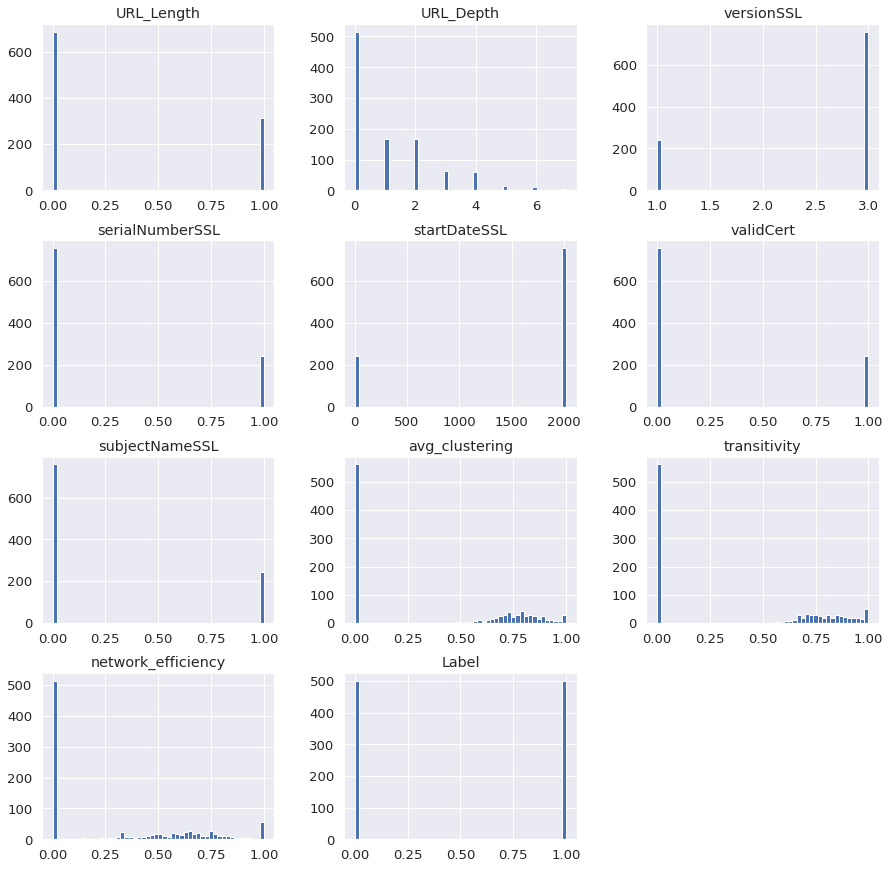

In [ ]:
#Plotting the data distribution
data.hist(bins = 50,figsize = (15,15))
plt.show()

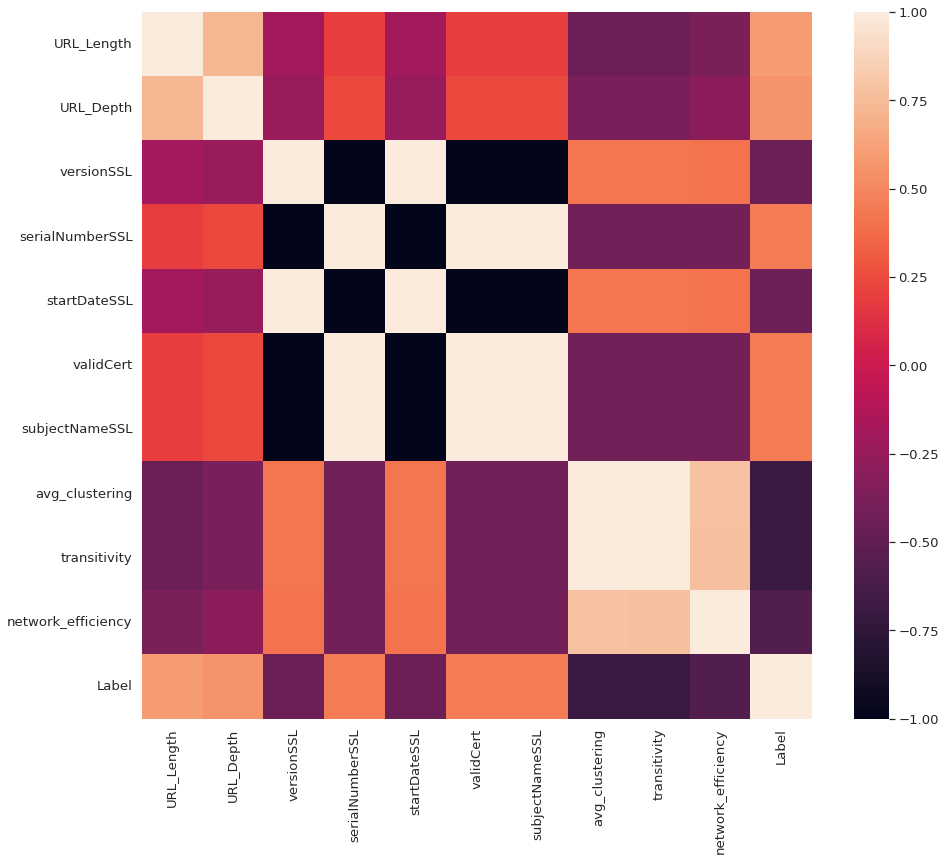

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
sns.set(font_scale = 1) # tamanho da fonte do gráfico
#plt.show()

#figure = a.get_figure()    
plt.savefig('correlation-matrix.pdf', bbox_inches='tight')

In [ ]:
data.describe()

,URL_Length,URL_Depth,versionSSL,serialNumberSSL,startDateSSL,validCert,subjectNameSSL,avg_clustering,transitivity,network_efficiency,Label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.313000,1.093000,2.516000,0.242000,1532.86800,0.242000,0.242000,0.340440,0.355954,0.310483,0.50000
std,0.463946,1.449984,0.857017,0.428509,865.98764,0.428509,0.428509,0.393708,0.410678,0.351706,0.50025
min,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,3.000000,0.000000,2021.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,3.000000,0.000000,2022.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.50000
75%,1.000000,2.000000,3.000000,0.000000,2022.00000,0.000000,0.000000,0.753414,0.779456,0.635911,1.00000
max,1.000000,7.000000,3.000000,1.000000,2022.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
#checking the data for null or missing values
data.isnull().sum()

URL_Length            0
URL_Depth             0
versionSSL            0
serialNumberSSL       0
startDateSSL          0
validCert             0
subjectNameSSL        0
avg_clustering        0
transitivity          0
network_efficiency    0
Label                 0
dtype: int64

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,URL_Length,URL_Depth,versionSSL,serialNumberSSL,startDateSSL,validCert,subjectNameSSL,avg_clustering,transitivity,network_efficiency,Label
0,0,0,1,1,1,1,1,0.000000,0.000000,0.000000,1
1,0,0,3,0,2022,0,0,0.565820,0.560710,0.590137,0
2,0,0,3,0,2022,0,0,0.880977,0.937081,0.845245,0
3,1,3,1,1,1,1,1,0.000000,0.000000,0.000000,1
4,0,0,3,0,2022,0,0,0.685998,0.675154,0.712079,0


In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((1000, 10), (1000,))

In [ ]:
# Splitting the dataset into train and test sets: 70-30 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, random_state = 12)
X_train.shape, X_test.shape

((700, 10), (300, 10))

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [ ]:
import datetime
import time

**1. Decision Tree Classifier**

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)

# get the start datetime
st = datetime.datetime.now()

# fit the model 
tree.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.011446 seconds


In [ ]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.008868 seconds


In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.4f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.4f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.9029
Decision Tree: Accuracy on test Data: 0.8800


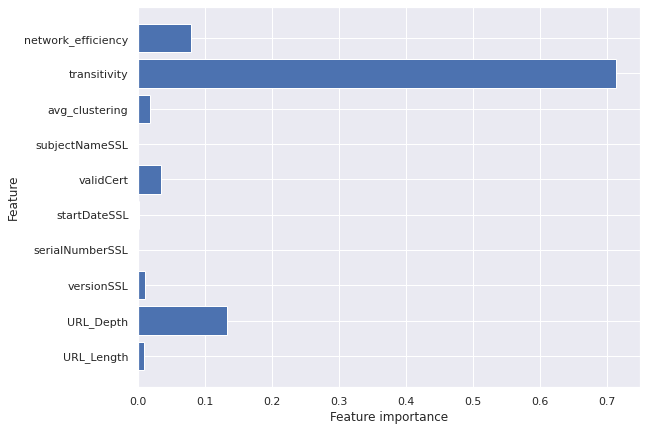

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
cm = confusion_matrix(y_test,y_test_tree)
cm

array([[145,  14],
       [ 22, 119]])

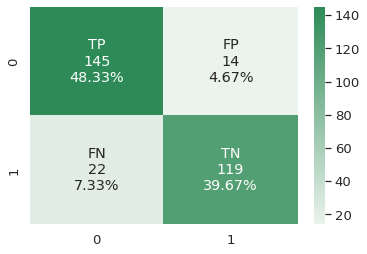

In [ ]:
# Matriz de confusão
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.2) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap)

figure = a.get_figure()    
plt.savefig('matriz-decisiontree.pdf', bbox_inches='tight')

In [ ]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_tree, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.8683    0.9119    0.8896       159
class 1: phishing     0.8947    0.8440    0.8686       141

         accuracy                         0.8800       300
        macro avg     0.8815    0.8780    0.8791       300
     weighted avg     0.8807    0.8800    0.8797       300



In [ ]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,average_precision_score, accuracy_score

In [ ]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_tree)
test_ap = average_precision_score(y_test,y_test_tree)
test_ac = accuracy_score(y_test, y_test_tree.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.8780
Test Average Precision Score = 0.8285
Test Accuracy Score = 0.8800


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_tree, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_tree, y_test)
auc_roc = auc(fpr, tpr)

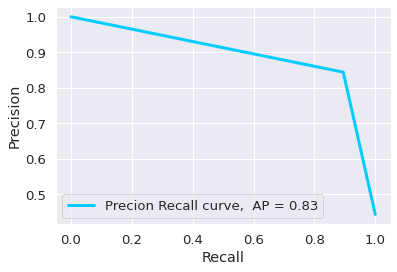

In [ ]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
 
plt.savefig('pr-decision-tree.pdf', bbox_inches='tight')

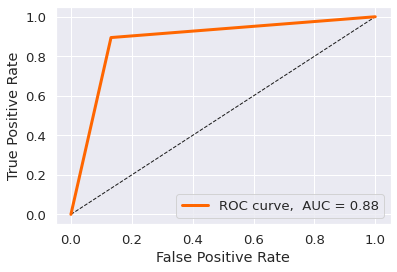

In [ ]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()

plt.savefig('roc-decision-tree.pdf', bbox_inches='tight')

**2. Random Forest Classifier**

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# get the start datetime
st = datetime.datetime.now()

# fit the model 
forest.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.220234 seconds


In [ ]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.087395 seconds


In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.4f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.4f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.9014
Random forest: Accuracy on test Data: 0.8867


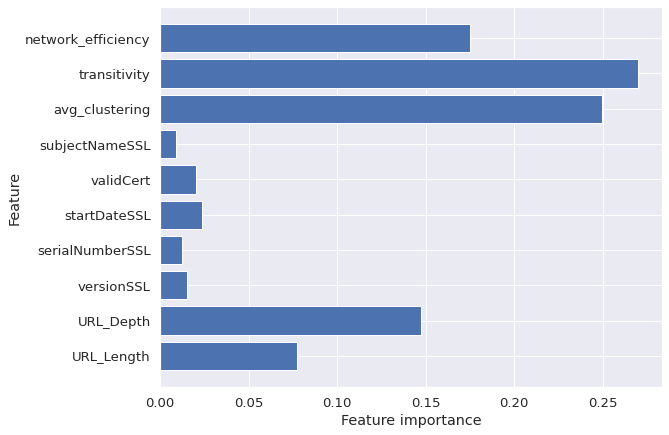

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [ ]:
cm = confusion_matrix(y_test,y_test_forest)
cm

array([[147,  12],
       [ 22, 119]])

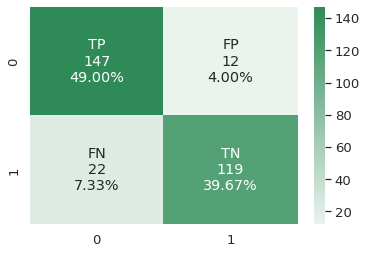

In [ ]:
# Matriz de confusão
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.2) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap)

figure = a.get_figure()    
plt.savefig('matriz-randomforest.pdf', bbox_inches='tight')

In [ ]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_forest, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.8698    0.9245    0.8963       159
class 1: phishing     0.9084    0.8440    0.8750       141

         accuracy                         0.8867       300
        macro avg     0.8891    0.8842    0.8857       300
     weighted avg     0.8880    0.8867    0.8863       300



In [ ]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_forest)
test_ap = average_precision_score(y_test,y_test_forest)
test_ac = accuracy_score(y_test, y_test_forest.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.8842
Test Average Precision Score = 0.8400
Test Accuracy Score = 0.8867


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_forest, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_forest, y_test)
auc_roc = auc(fpr, tpr)

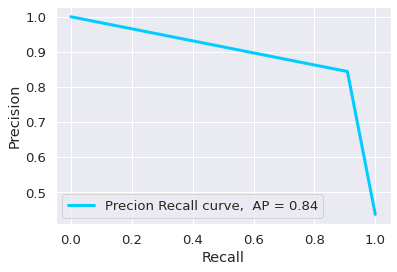

In [ ]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
  
plt.savefig('pr-random-forest.pdf', bbox_inches='tight')

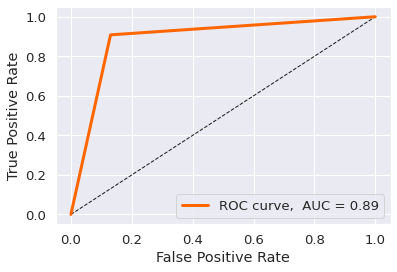

In [ ]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()
 
plt.savefig('roc-random-forest.pdf', bbox_inches='tight')

**3. Multilayer Perceptrons (MLPs)**

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# get the start datetime
st = datetime.datetime.now()

# fit the model 
mlp.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.778816 seconds


In [ ]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.024179 seconds


In [ ]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.4f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.4f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.6929
Multilayer Perceptrons: Accuracy on test Data: 0.6933


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

In [ ]:
cm = confusion_matrix(y_test,y_test_mlp)
cm

array([[150,   9],
       [ 83,  58]])

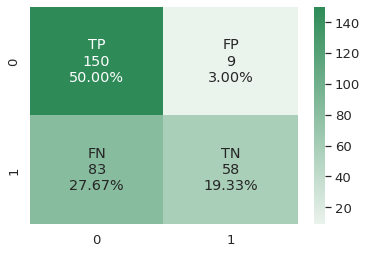

In [ ]:
# Matriz de confusão
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.2) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap)

figure = a.get_figure()    
plt.savefig('matriz-mlp.pdf', bbox_inches='tight')

In [ ]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_mlp, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.6438    0.9434    0.7653       159
class 1: phishing     0.8657    0.4113    0.5577       141

         accuracy                         0.6933       300
        macro avg     0.7547    0.6774    0.6615       300
     weighted avg     0.7481    0.6933    0.6677       300



In [ ]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_mlp)
test_ap = average_precision_score(y_test,y_test_mlp)
test_ac = accuracy_score(y_test, y_test_mlp.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.6774
Test Average Precision Score = 0.6328
Test Accuracy Score = 0.6933


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_mlp, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_mlp, y_test)
auc_roc = auc(fpr, tpr)

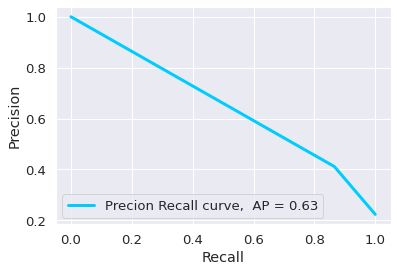

In [ ]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
    
plt.savefig('pr-mlp.pdf', bbox_inches='tight')

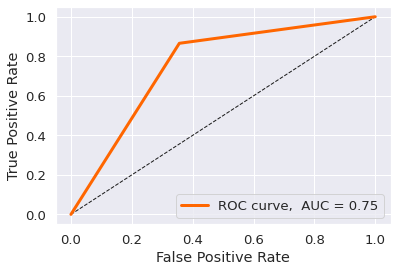

In [ ]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()
 
plt.savefig('roc-mlp.pdf', bbox_inches='tight')

**4. XGBoost Classifier**

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

# get the start datetime
st = datetime.datetime.now()

#fit the model
xgb.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.215520 seconds


In [ ]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.013970 seconds


In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.4f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.4f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.9214
XGBoost : Accuracy on test Data: 0.8967


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [ ]:
cm = confusion_matrix(y_test,y_test_xgb)
cm

array([[147,  12],
       [ 19, 122]])

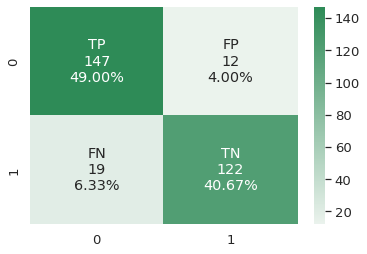

In [ ]:
# Matriz de confusão
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.2) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap)

figure = a.get_figure()    
plt.savefig('matriz-xgboost.pdf', bbox_inches='tight')

In [ ]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_xgb, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.8855    0.9245    0.9046       159
class 1: phishing     0.9104    0.8652    0.8873       141

         accuracy                         0.8967       300
        macro avg     0.8980    0.8949    0.8959       300
     weighted avg     0.8972    0.8967    0.8965       300



In [ ]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_xgb)
test_ap = average_precision_score(y_test,y_test_xgb)
test_ac = accuracy_score(y_test, y_test_xgb.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.8949
Test Average Precision Score = 0.8511
Test Accuracy Score = 0.8967


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_xgb, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_xgb, y_test)
auc_roc = auc(fpr, tpr)

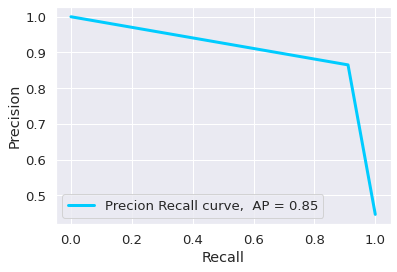

In [ ]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()

plt.savefig('pr-xgboost.pdf', bbox_inches='tight')

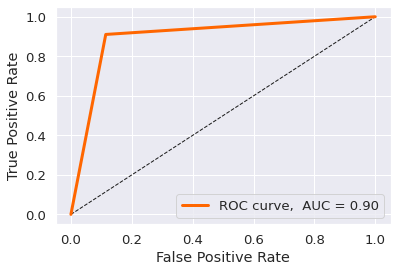

In [ ]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()

plt.savefig('roc-xgboost.pdf', bbox_inches='tight')

**5. Support Vector Machines**

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)

# get the start datetime
st = datetime.datetime.now()

#fit the model
svm.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.039307 seconds


In [ ]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.017615 seconds


In [ ]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.4f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.4f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.8743
SVM : Accuracy on test Data: 0.8800


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

In [ ]:
cm = confusion_matrix(y_test,y_test_svm)
cm

array([[145,  14],
       [ 22, 119]])

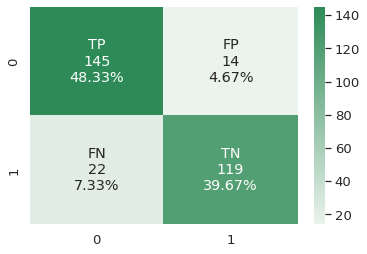

In [ ]:
# Matriz de confusão
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.2) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap)

figure = a.get_figure()    
plt.savefig('matriz-svm.pdf', bbox_inches='tight')

In [ ]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_svm, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.8683    0.9119    0.8896       159
class 1: phishing     0.8947    0.8440    0.8686       141

         accuracy                         0.8800       300
        macro avg     0.8815    0.8780    0.8791       300
     weighted avg     0.8807    0.8800    0.8797       300



In [ ]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_svm)
test_ap = average_precision_score(y_test,y_test_svm)
test_ac = accuracy_score(y_test, y_test_svm.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.8780
Test Average Precision Score = 0.8285
Test Accuracy Score = 0.8800


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_svm, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_svm, y_test)
auc_roc = auc(fpr, tpr)

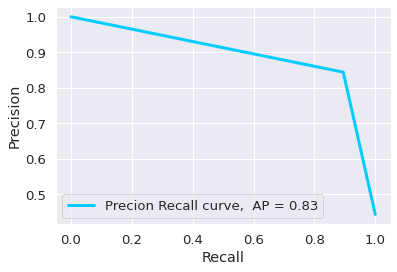

In [ ]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
 
plt.savefig('pr-svm.pdf', bbox_inches='tight')

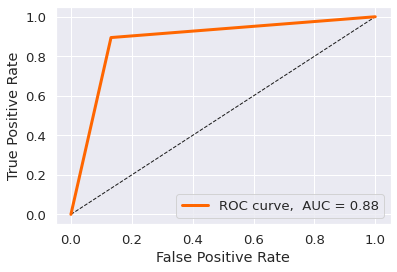

In [ ]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()

plt.savefig('roc-svm.pdf', bbox_inches='tight')

**Comparision of Models**

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.903,0.880
1,Random Forest,0.901,0.887
2,Multilayer Perceptrons,0.693,0.693
3,XGBoost,0.921,0.897
4,SVM,0.874,0.880


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.921,0.897
1,Random Forest,0.901,0.887
0,Decision Tree,0.903,0.880
4,SVM,0.874,0.880
2,Multilayer Perceptrons,0.693,0.693
